In [21]:
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
file_path = 'C:/data analytics/ECOMM DATA.xlsx'
df = pd.read_excel(file_path)

In [23]:
print("Basic Information About the Dataset:")
print(df.info())

Basic Information About the Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      5

In [24]:
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,51290,51290,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,2013-05-11 21:26:49.155781120,2013-05-15 20:42:42.745174528,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375818
min,1.00000,2011-01-01 00:00:00,2011-01-03 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.002000
25%,12823.25000,2012-06-19 00:00:00,2012-06-23 00:00:00,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,2013-07-08 00:00:00,2013-07-12 00:00:00,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,2014-05-22 00:00:00,2014-05-26 00:00:00,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,2014-12-31 00:00:00,2015-01-07 00:00:00,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000
std,14806.29199,NaN,NaN,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296810


In [25]:
df['Order Date']= pd.to_datetime(df['Order Date'], dayfirst=True)
df['Ship Date']=pd.to_datetime(df['Ship Date'], dayfirst=True)

df.dropna(subset=['Sales', 'Profit', 'Quantity'], inplace=True)


df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['Profit'] = pd.to_numeric(df['Profit'], errors='coerce')

In [26]:
total_sales = df['Sales'].sum()
print(f"\nTotal Sales: ${total_sales:.2f}")


Total Sales: $12642501.91


In [27]:
df.set_index('Order Date', inplace=True)

In [28]:
monthly_sales = df[['Sales']].resample('M').sum()

In [29]:
top_products_revenue = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False)
top_products_quantity = df.groupby('Product Name')['Quantity'].sum().sort_values(ascending=False)

In [30]:
top_customers_revenue = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False)
top_customers_quantity = df.groupby('Customer Name')['Quantity'].sum().sort_values(ascending=False)

<Figure size 1000x600 with 0 Axes>

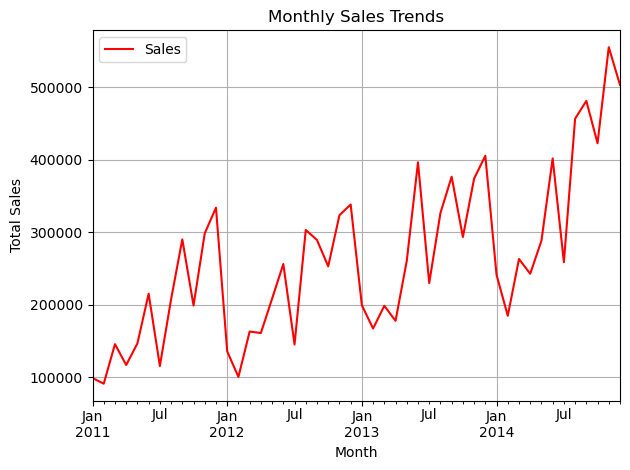

In [31]:
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', title='Monthly Sales Trends', color='red')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()  # Add a break before the next plot
plt.show()

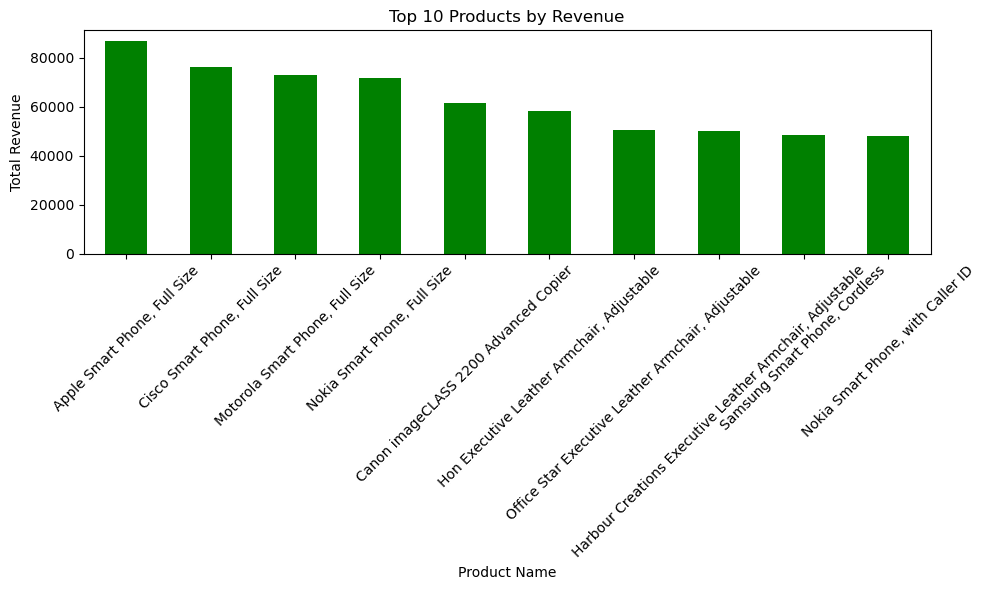

In [32]:
plt.figure(figsize=(10, 6))
top_products_revenue.head(10).plot(kind='bar', color='Green', title='Top 10 Products by Revenue')
plt.xlabel('Product Name')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

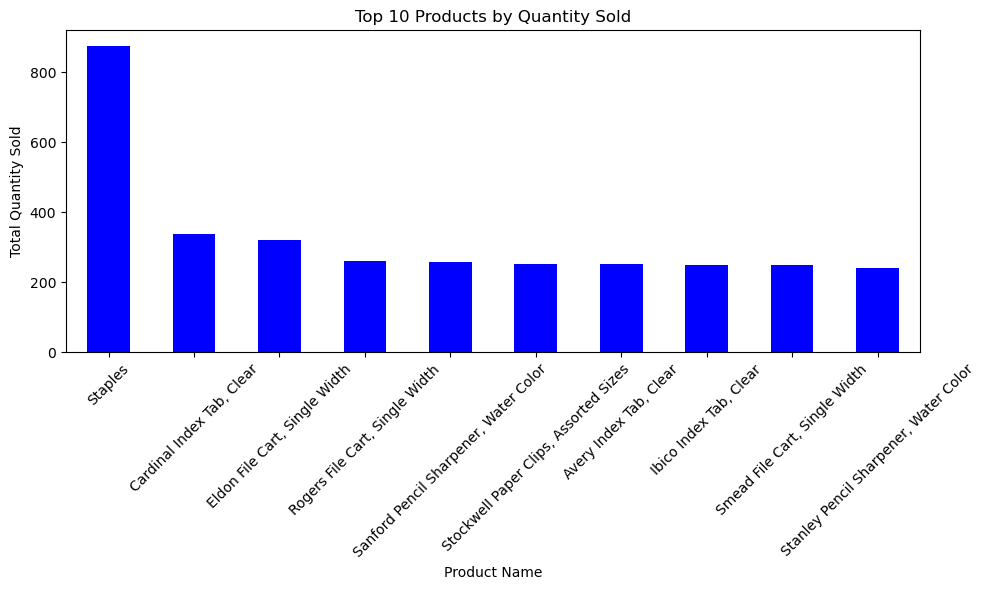

In [33]:
plt.figure(figsize=(10, 6))
top_products_quantity.head(10).plot(kind='bar', color='Blue', title='Top 10 Products by Quantity Sold')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

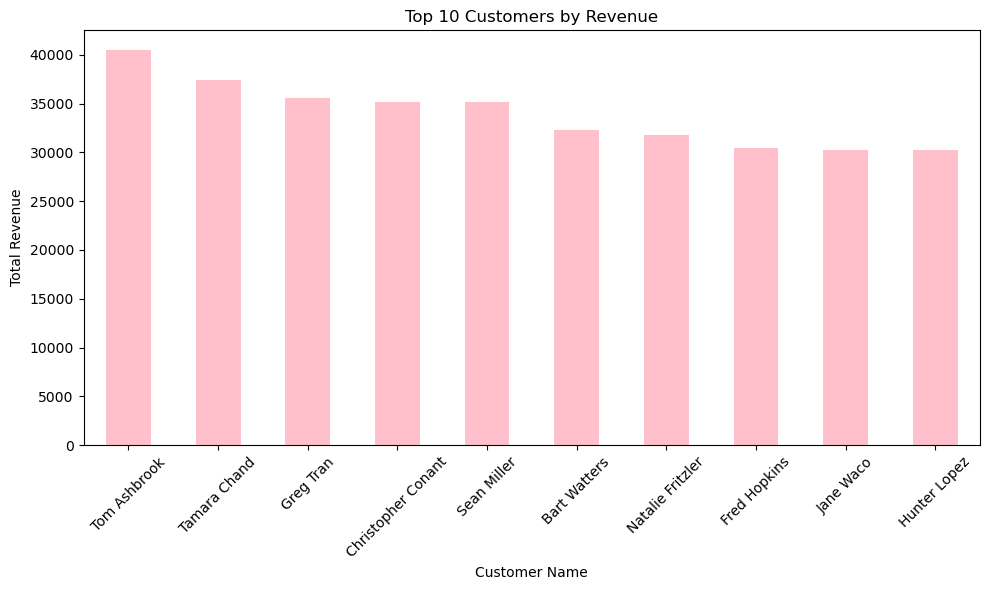

In [34]:
plt.figure(figsize=(10, 6))
top_customers_revenue.head(10).plot(kind='bar', color='Pink', title='Top 10 Customers by Revenue')
plt.xlabel('Customer Name')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

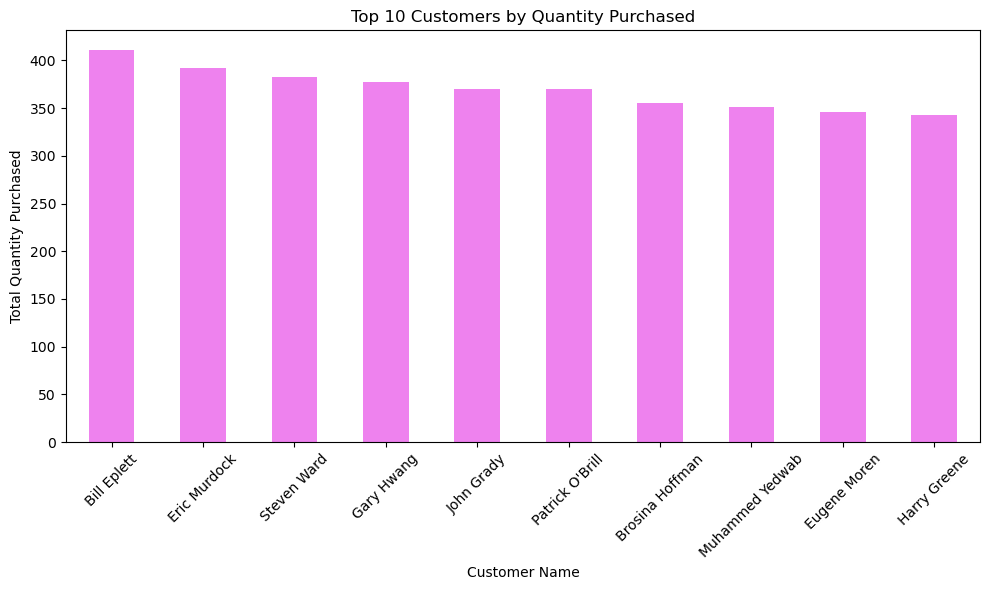

In [20]:
plt.figure(figsize=(10, 6))
top_customers_quantity.head(10).plot(kind='bar', color='Violet', title='Top 10 Customers by Quantity Purchased')
plt.xlabel('Customer Name')
plt.ylabel('Total Quantity Purchased')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()